<center>
<p style="text-align: center;"><b><i>Task-04: SENTIMENT ANALYSIS ON SOCIAL MEDIA: INSIGHTS AND TRENDS FROM TWITTER DATA</i></b></p>
Prepared by Abir LASSOUED

</center>

![](https://cdn-www.oktopost.com/blog/wp-content/uploads/2022/03/social-media-sentiment-analysis-blog-cover.png)

## Dataset Overview

**Data Description :** <br>
The dataset contains social media posts from Twitter, with a focus on analyzing and visualizing sentiment patterns. Each entry represents a tweet or post that has been categorized based on its content and sentiment.<br>


**Features :** <br>
* **ID :** Unique identifier for each tweet.<br>
* **Topic :** The subject or theme of the tweet.<br>
* **Sentiment :** The sentiment expressed in the tweet (e.g., Positive, Negative, Neutral).<br>
* **Content :** The actual text content of the tweet.<br>


**Data URL :** <br>
You can find the dataset on Kaggle: <br>
https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis


## Importing and Understanding Data

In [447]:
!pip install emoji

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import emoji
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [449]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [450]:
df = pd.read_csv('/content/twitter_training.csv')

In [451]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [452]:
# Add column names

df.columns = ['ID', 'Topic', 'Sentiment', 'Content']
df.head()

,ID,Topic,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [453]:
# Data size

df.shape

(74681, 4)

In [454]:
# Data types of each column

df.dtypes

,0
ID,int64
Topic,object
Sentiment,object
Content,object


In [455]:
# Count the number of occurrences of elements in df

df.count()

,0
ID,74681
Topic,74681
Sentiment,74681
Content,73995


In [456]:
# More information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Topic      74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [457]:
# List columns

df.columns.tolist()

['ID', 'Topic', 'Sentiment', 'Content']

In [458]:
df.describe(include='all')

,ID,Topic,Sentiment,Content
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


## Data Preprocessing

In [459]:
# Check the number of missing values in each column

df.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Content,686


In [460]:
# Drop rows with any missing values from the DataFrame

df.dropna(axis=0, inplace=True)

In [461]:
# Verify that there are no missing values left in the DataFrame

df.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Content,0


In [462]:
# Check the number of duplicate rows in the DataFrame

df.duplicated().sum()

2340

In [463]:
# Remove duplicate rows from the DataFrame

df.drop_duplicates(inplace=True)

In [464]:
# Verify that there are no duplicate rows left in the DataFrame

df.duplicated().sum()

0

In [465]:
# Drop the 'ID' column ()

df = df.drop('ID', axis=1)

In [466]:
# Print unique values number for each variable

for col in df:
    print(f"Unique values number in '{col}':")
    print(df[col].nunique())
    print("-" * 40)

Unique values number in 'Topic':
32
----------------------------------------
Unique values number in 'Sentiment':
4
----------------------------------------
Unique values number in 'Content':
69490
----------------------------------------


## Exploratory Data Analysis (EDA)

In [467]:
# Checking the distribution of "Sentiment" column

sentiments = df['Sentiment'].value_counts()
sentiments

,count
Sentiment,
Negative,21698
Positive,19712
Neutral,17708
Irrelevant,12537


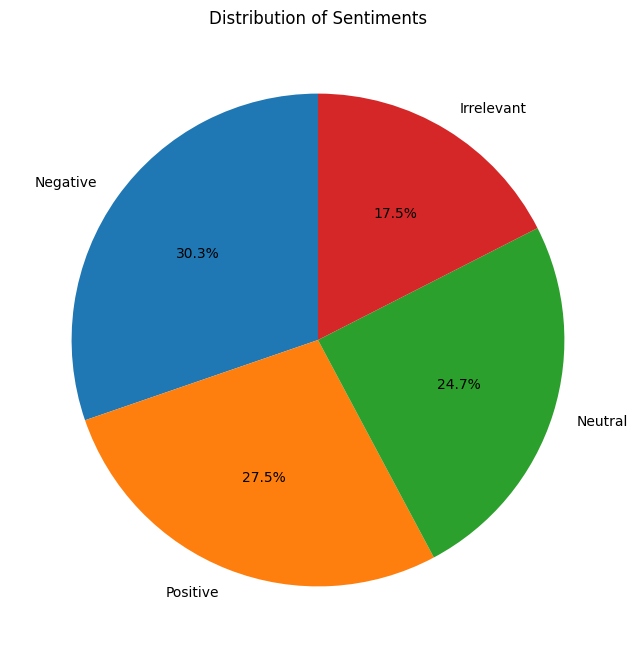

In [468]:
#Visualizing Distribution of sentiments towards different entities in a pie chart

plt.figure(figsize=(8, 8))
plt.pie(sentiments, labels=sentiments.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments')
plt.show()

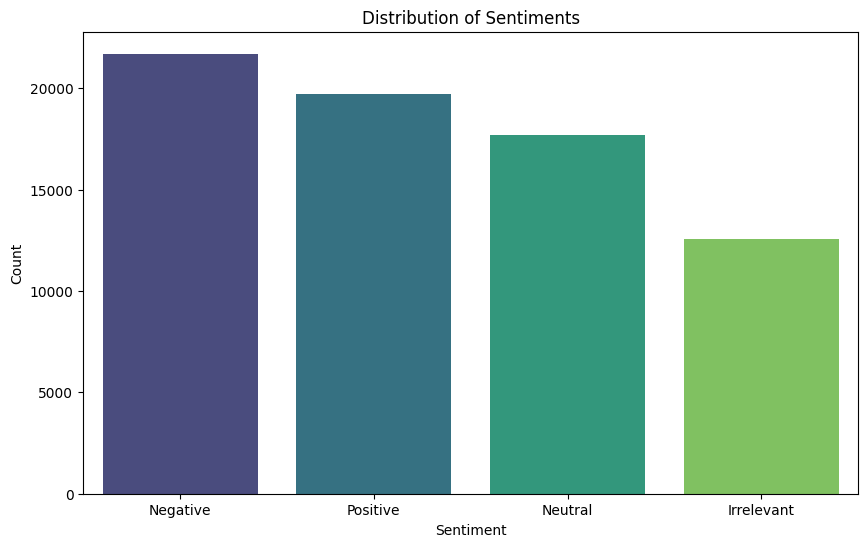

In [469]:
#Visualizing Distribution of sentiments with a count plot

plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df, order = df['Sentiment'].value_counts().index, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [470]:
topic = df['Topic'].value_counts()
topic

,count
Topic,
TomClancysRainbowSix,2328
Verizon,2319
MaddenNFL,2315
CallOfDuty,2314
Microsoft,2304
WorldOfCraft,2300
NBA2K,2299
LeagueOfLegends,2296
TomClancysGhostRecon,2291


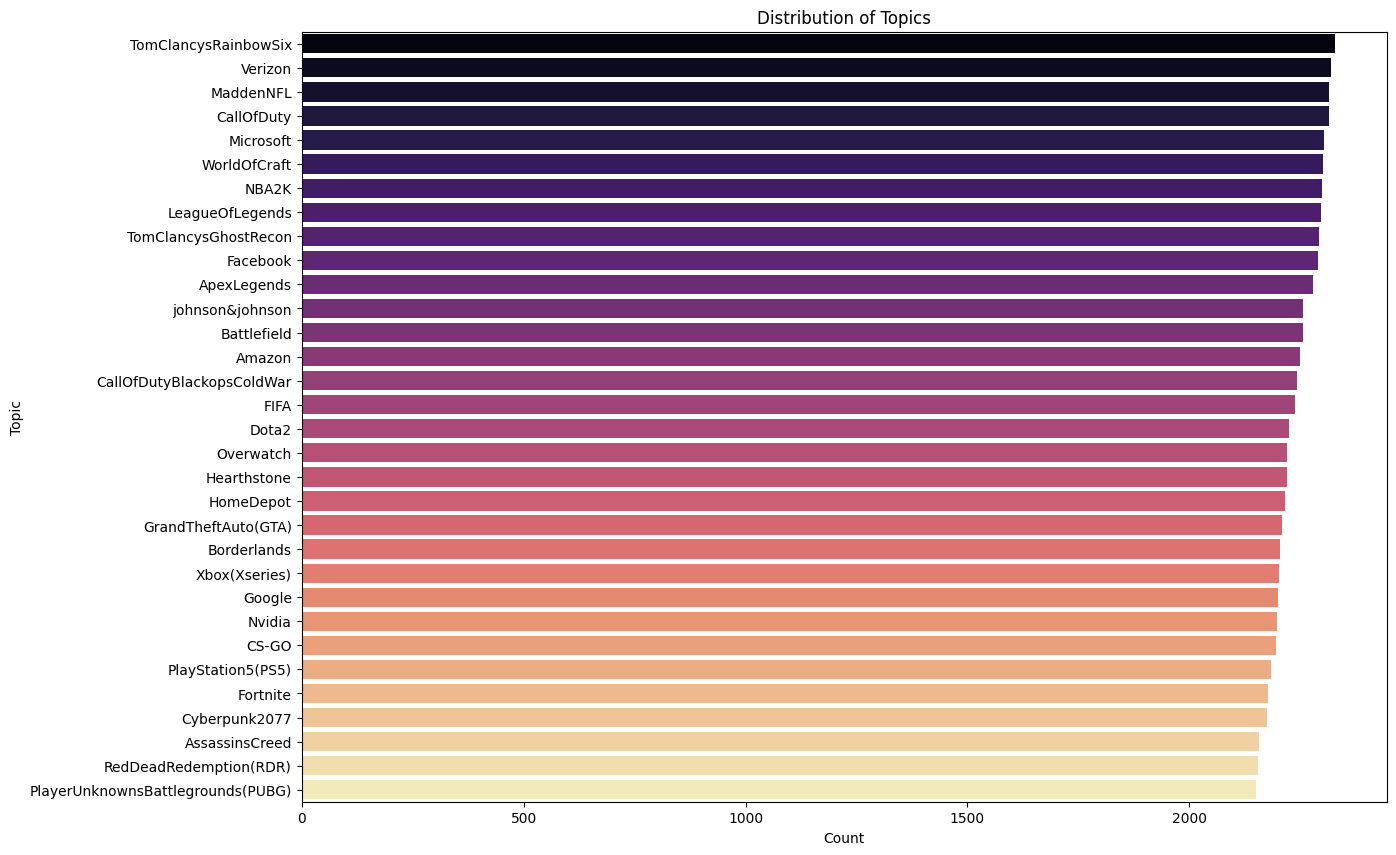

In [471]:
# Visualize the distribution of topics

plt.figure(figsize=(14, 10))
sns.barplot(y=topic.index, x=topic.values, palette='magma')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Distribution of Topics')
plt.show()


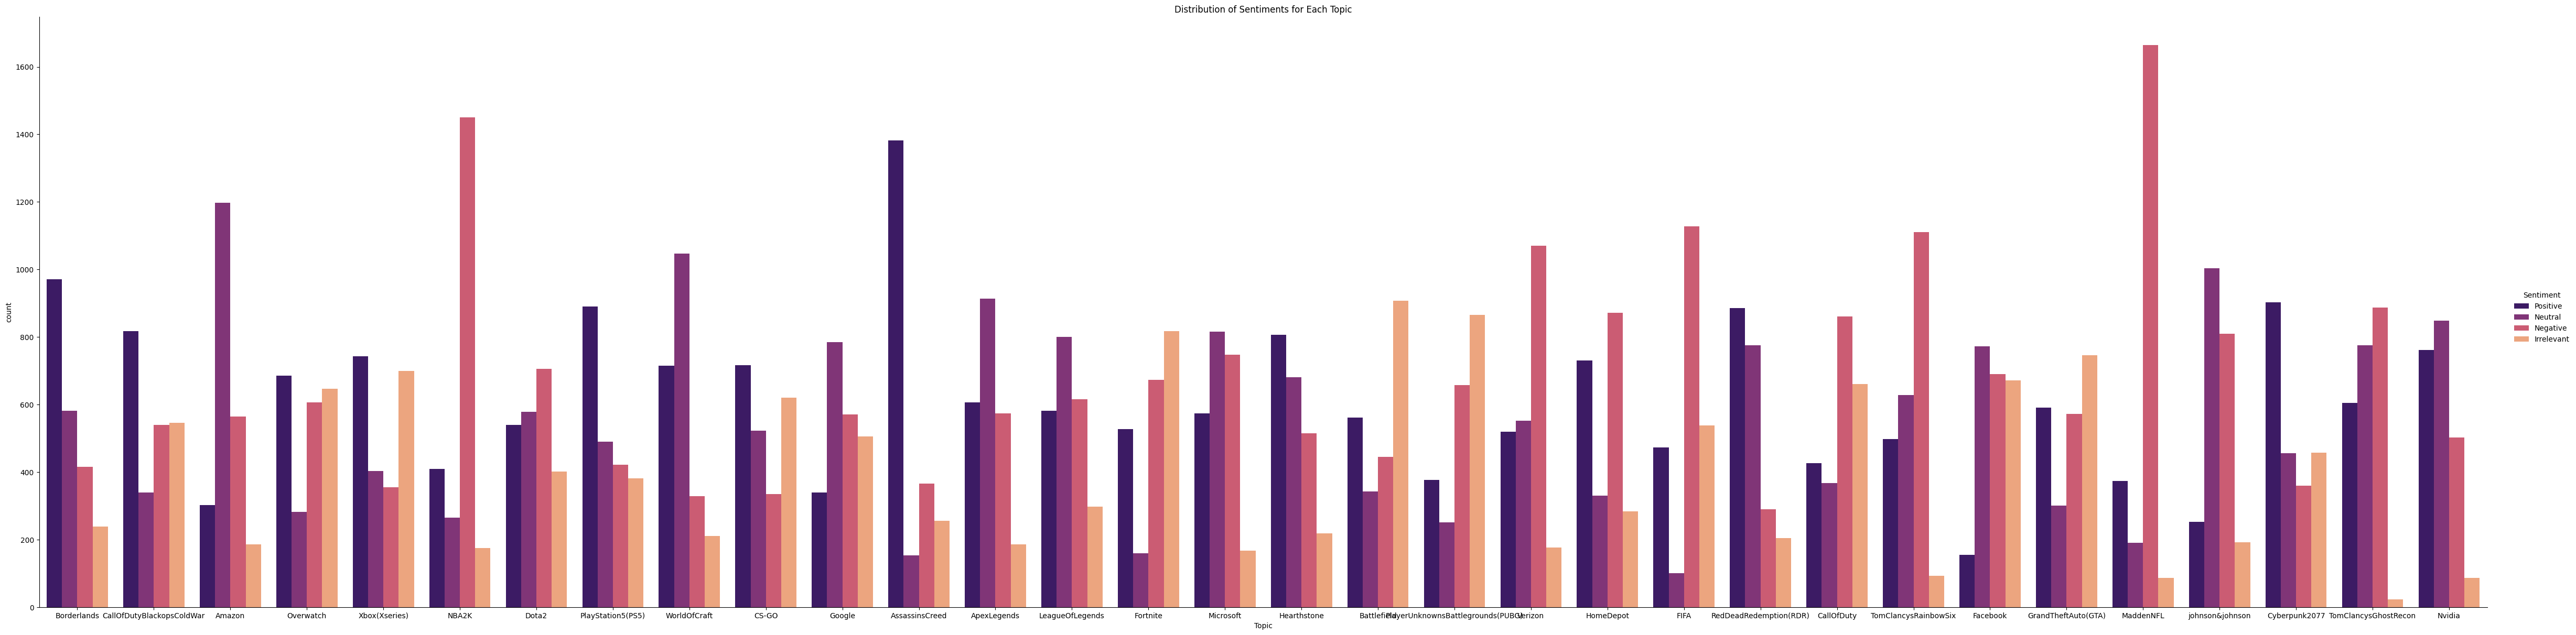

In [472]:
# Visualize the distribution of sentiments for each topic

sns.catplot(x='Topic', kind='count', hue='Sentiment', data=df, palette='magma', height=12, aspect=4)
plt.title('Distribution of Sentiments for Each Topic')
plt.show()


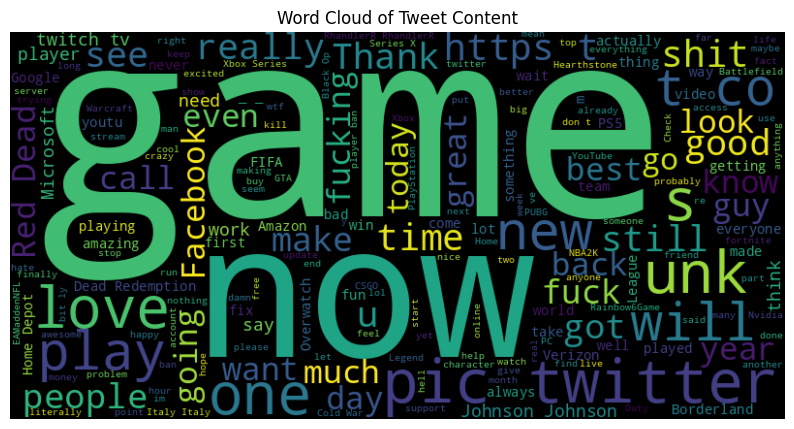

In [473]:
# Combine all tweet content into a single string
text = " ".join(tweet for tweet in df['Content'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Tweet Content')
plt.show()


## Text Preprocessing

In [474]:
# Convert the 'Content' column to lowercase

df['Content'] = df['Content'].str.lower()
df.head()


,Topic,Sentiment,Content
0,Borderlands,Positive,i am coming to the borders and i will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [475]:
# Remove HTML tags

def cleaning_HTML_tags(content):
  return re.sub('<.*?>', '', content)


In [476]:
# Remove URLs

def cleaning_URLs(content):
  return re.sub('((www.[^ ]+)|(https?://[^ ]+))','',content)


In [477]:
# Remove special characters

def cleaning_special_characters(content):
  return re.sub('[^a-zA-Z0-9\s]', '', content)

In [478]:
# Remove all numeric digits
def cleaning_numbers(content):
  return re.sub(r'\d+', '', content)


In [479]:
# Remove emojis

def cleaning_emoji(content):
  return emoji.replace_emoji(content, replace='')

In [480]:
# Remove punctuation characters

def cleaning_punctuations(content):
  punctuations = string.punctuation
  return content.translate(str.maketrans('', '', punctuations))

In [481]:
# Remove common stopwords

def cleaning_stopwords(content):
  STOPWORDS = set(stopwords.words('english'))
  return " ".join([word for word in str(content).split() if word not in STOPWORDS])

In [482]:
# Apply stemming to reduce words to their root forms

portStem = PorterStemmer()
def stemming(content):
  stem_text = [portStem.stem(word) for word in content.split()]
  return " ".join(stem_text)

In [483]:
# Apply lemmatization to reduce words to their base or dictionary form

lemmatizer = WordNetLemmatizer()
def lemmatizing(content):
  lemm_text = [lemmatizer.lemmatize(word) for word in content.split()]
  return " ".join(lemm_text)


In [484]:
# Combine all preprocessing steps in a single function
def full_preprocessing(df):
    df['Content'] = df['Content'].apply(cleaning_HTML_tags)
    df['Content'] = df['Content'].apply(cleaning_URLs)
    df['Content'] = df['Content'].apply(cleaning_special_characters)
    df['Content'] = df['Content'].apply(cleaning_numbers)
    df['Content'] = df['Content'].apply(cleaning_emoji)
    df['Content'] = df['Content'].apply(cleaning_punctuations)
    df['Content'] = df['Content'].apply(cleaning_stopwords)
    df['Content'] = df['Content'].apply(stemming)
    df['Content'] = df['Content'].apply(lemmatizing)
    return df



# Apply the full preprocessing function to your DataFrame
df = full_preprocessing(df)

In [485]:
df.head()

,Topic,Sentiment,Content
0,Borderlands,Positive,come border kill
1,Borderlands,Positive,im get borderland kill
2,Borderlands,Positive,im come borderland murder
3,Borderlands,Positive,im get borderland murder
4,Borderlands,Positive,im get borderland murder


## Model Building & Evaluation

In [486]:
# Split data into features (X) and target (y)

X = df['Content']
y = df['Sentiment']

In [487]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [488]:
# Convert text data into TF-IDF feature vectors for training and testing datasets

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [489]:
# Train a RandomForestClassifier model

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [490]:
# Make predictions on test data

y_pred = rf_classifier.predict(X_test_tfidf)

Accuracy: 0.9041937059521318
              precision    recall  f1-score   support

  Irrelevant       0.95      0.84      0.89      2455
    Negative       0.92      0.93      0.93      4433
     Neutral       0.92      0.88      0.90      3532
    Positive       0.85      0.94      0.89      3911

    accuracy                           0.90     14331
   macro avg       0.91      0.90      0.90     14331
weighted avg       0.91      0.90      0.90     14331



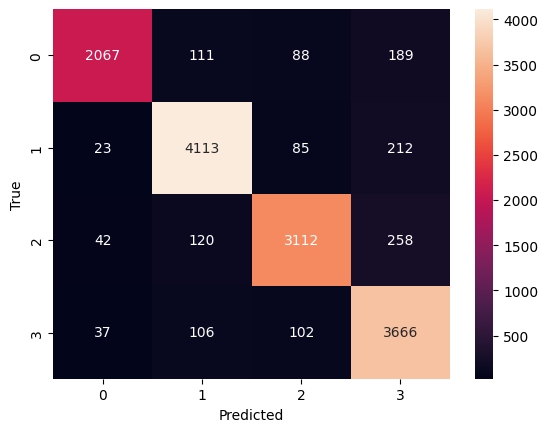

In [491]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()